# Ford GoBike System Dataset exploration
## by Noel Khaemba

## Investigation Overview

> In this investigation I wanted to establish how long the average trip takes, whether the trip duration depend on if a user is a subscriber or customer and determine the relationship between the age of a bike user and the trip duration. 


## Dataset Overview

> This dataset consists of information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

> After data wrangling and removing outliers I remained with 174875 records which I used to to do the data analysis.

> the features of interest in the dataset are duration_sec, user_type, member_birth_year, member_gender, bike_share_for_all_trip

## Key Insights for Presentation

> Most users ride the bikes for about 250 - 750 seconds. The average trip duration is 704.002744 seconds.

> The younger people between the ages of 20-40 cycle have more long duration bike rides than those above 60.

> The mean age of those who bike share across the different genders is lower than those who don't bike share.

> There are more subscribers with ages below 70 and with low bike durations compared to customers. Overall there are more subscribers than customers.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# loading in the dataset into a pandas dataframe
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#Data wrangling
fordgobike['start_time'] = pd.to_datetime(fordgobike['start_time'])
fordgobike['end_time'] = pd.to_datetime(fordgobike['end_time'])

fordgobike['bike_id'] = fordgobike['bike_id'].astype('str')

#drop records with null values
fordgobike = fordgobike.dropna()

fordgobike['member_birth_year'] = fordgobike['member_birth_year'].astype(int)

In [4]:
# creating a new varuable for age
fordgobike['age'] = 2019 - fordgobike['member_birth_year']

# excluding records with age above 90.

fordgobike = fordgobike.query('age < 91')
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174875 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               174875 non-null int64
start_time                 174875 non-null datetime64[ns]
end_time                   174875 non-null datetime64[ns]
start_station_id           174875 non-null float64
start_station_name         174875 non-null object
start_station_latitude     174875 non-null float64
start_station_longitude    174875 non-null float64
end_station_id             174875 non-null float64
end_station_name           174875 non-null object
end_station_latitude       174875 non-null float64
end_station_longitude      174875 non-null float64
bike_id                    174875 non-null object
user_type                  174875 non-null object
member_birth_year          174875 non-null int64
member_gender              174875 non-null object
bike_share_for_all_trip    174875 non-null object
age                        174875 non-null int64
dtypes: datetime64[n

## (Visualization 1)

> Most users ride the bikes for about 250 - 750 seconds. The average trip duration is 704.002744 seconds.

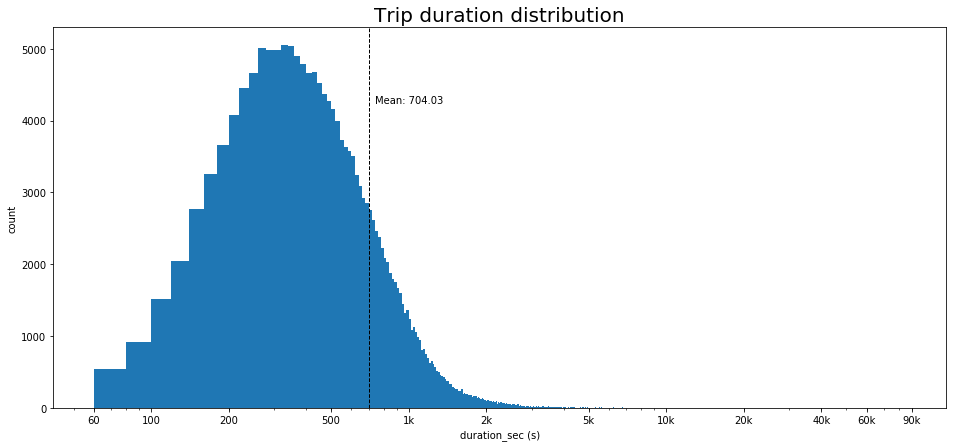

In [5]:
# trip duration plot

bins=np.arange(60,85e3,20)
#bins = 10 ** np.arange(1.7, 4.9+0.1, 0.1)
plt.figure(figsize=[16, 7])

x_ticklocs=[60, 100,200,500,1e3,2e3,5e3,10e3, 20e3,40e3,60e3,90e3]
x_ticklabels=['60','100','200','500','1k','2k','5k','10k','20k','40k','60k','90k']

plt.hist(data = fordgobike, x = 'duration_sec', bins=bins)

plt.axvline(fordgobike.duration_sec.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(fordgobike.duration_sec.mean()*1.05, max_ylim*0.8, 'Mean: {:.2f}'.format(fordgobike.duration_sec.mean()));

plt.xscale('log')

plt.xticks(x_ticklocs, x_ticklabels)
plt.xlabel('duration_sec (s)')
plt.ylabel('count')
plt.title('Trip duration distribution', size=20);

## (Visualization 2)

> The younger people between the ages of 20-50 years have more long duration bike rides than those above 60.

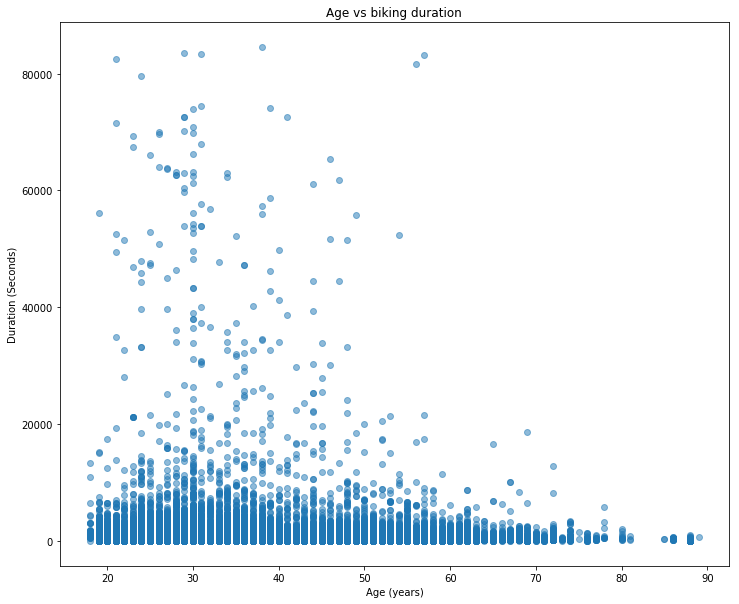

In [6]:
plt.figure(figsize=(12,10))
plt.scatter(data = fordgobike, x = 'age', y = 'duration_sec', alpha=1/2);
plt.xlabel('Age (years)')
plt.ylabel('Duration (Seconds)')
plt.title('Age vs biking duration');
#plt.ylim(0,6000);

## (Visualization 3)

> The mean age of those who bike share across the different genders is lower than those who don't bike share.

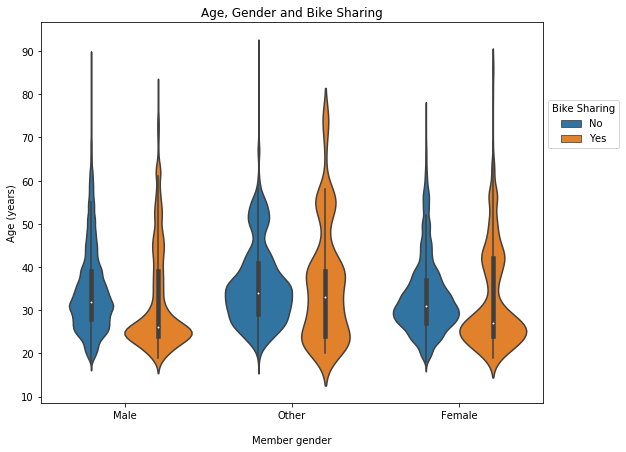

In [7]:
plt.figure(figsize=(9,7))

sb.violinplot(data=fordgobike, x='member_gender', y='age', hue='bike_share_for_all_trip', inner='box')

plt.xlabel('Member gender', labelpad=15)
plt.ylabel('Age (years)')
plt.title('Age, Gender and Bike Sharing')
plt.legend(title='Bike Sharing', bbox_to_anchor=(1, 0.81));

## (Visualization 4)

> There are more subscribers with ages below 70 and with low bike durations compared to customers. Overall there are more subscribers than customers.

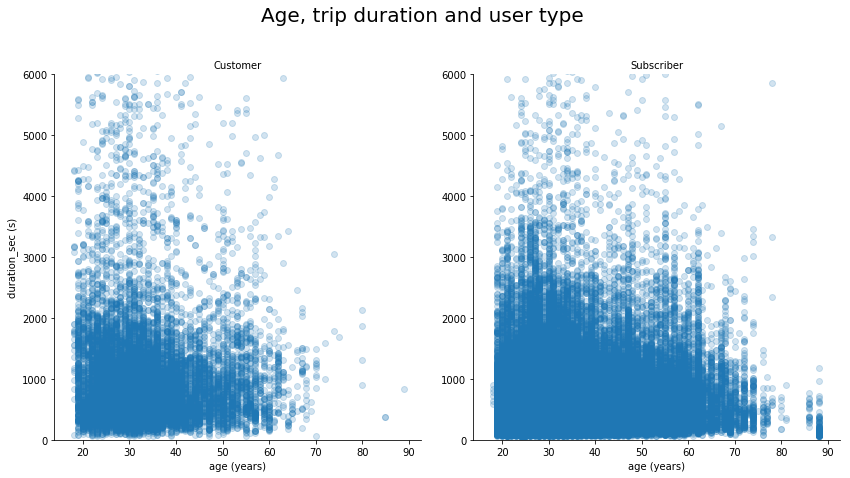

In [8]:
g = sb.FacetGrid(data = fordgobike, col = 'user_type', size = 6)
g.map(sb.regplot, 'age', 'duration_sec', y_jitter = 0.04, fit_reg = False, scatter_kws = {'alpha' : 1/5})

g.set_xlabels('age (years)')
g.set_ylabels('duration_sec (s)')
g.set_titles('{col_name}') 
plt.suptitle('Age, trip duration and user type', size=20, y=1.1)
plt.ylim(0,6000);



In [ ]:
# The command below will generate the HTML slideshow. 
!jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_notebook.ipynb to slides
[NbConvertApp] Writing 639186 bytes to Part_II_notebook.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_notebook.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found
